In [6]:
from datetime import datetime
from pandas_datareader import data as web


               Open      High     Low   Close    Volume
Date                                                   
2021-03-12  106.180  110.8800  105.53  109.99   4187474
2021-03-11  112.850  114.4718  108.11  110.44   9068547
2021-03-10  110.620  112.6600  101.81  103.10   9293328
2021-03-09  104.150  110.7900  104.01  107.40  11670397
2021-03-08  111.000  114.0000   97.41   98.59  16406104
...             ...       ...     ...     ...       ...
2019-01-08   14.515   15.1000   14.40   14.78   4795206
2019-01-07   13.940   14.3700   13.74   14.27   2357990
2019-01-04   13.450   13.8900   13.40   13.70   2971913
2019-01-03   14.190   14.2000   12.85   12.95   5039104
2019-01-02   14.000   14.6300   13.98   14.28   1902084

[553 rows x 5 columns]
2019-01-01       NaN
2019-01-02     14.28
2019-01-03     12.95
2019-01-04     13.70
2019-01-07     14.27
               ...  
2021-03-08     98.59
2021-03-09    107.40
2021-03-10    103.10
2021-03-11    110.44
2021-03-12    109.99
Freq: B, Name: Cl

<ipython-input-12-6a681de7b91f>:65: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


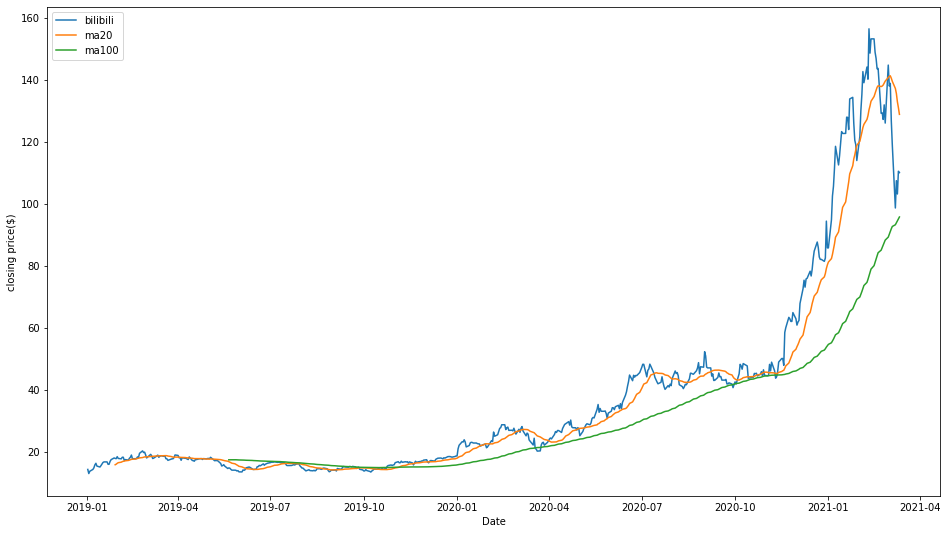

In [12]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import matplotlib.pyplot as plt

def fetch_kline(symbol, start, end, type, source=None):
    """
    def DataReader(
        name,
        data_source=None,
        start=None,
        end=None,
        retry_count=3,
        pause=0.1,
        session=None,
        api_key=None,
    )
    """
    if type == 'stock':
        source = 'stooq' if not source else source
        return web.DataReader(symbol, source, start, end)


def calc_ma(price_df, size):
    ma = price_df.rolling(window=size).mean()
    return ma





    # start = datetime.datetime(2019, 1, 1)
    # end = datetime.datetime(2021, 3, 14)
    start = '2019-01-01'
    end = '2021-03-14'
    bili_his = fetch_kline('BILI', start, end, 'stock')
    print(bili_his)

    # filter weekday's close price
    close = bili_his['Close']
    all_weekdays = pd.date_range(start=start, end=end, freq='B')
    close = close.reindex(all_weekdays)
    close = close.fillna(method='ffill')
    print(close)
    print(close.describe())

    # draw ma20 ma100 ma120
    ma20 = calc_ma(close, 20)
    ma100 = calc_ma(close, 100)

    print(ma20)
    print(ma100)


    fig, ax = plt.subplots(figsize=(16, 9))

    ax.plot(close.index, close, label='bilibili')
    ax.plot(ma20.index, ma20, label='ma20')
    ax.plot(ma100.index, ma100, label='ma100')

    ax.set_xlabel('Date')
    ax.set_ylabel('closing price($)')
    ax.legend()

    fig.show()



In [13]:
import ccxt

ModuleNotFoundError: No module named 'ccxt'